In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [6]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [7]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [8]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [9]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3)

In [12]:
len(X_train)

623

In [13]:
len(X_test)

268

In [14]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
model.score(X_test,y_test)

0.7723880597014925

In [17]:
pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7723880597014925

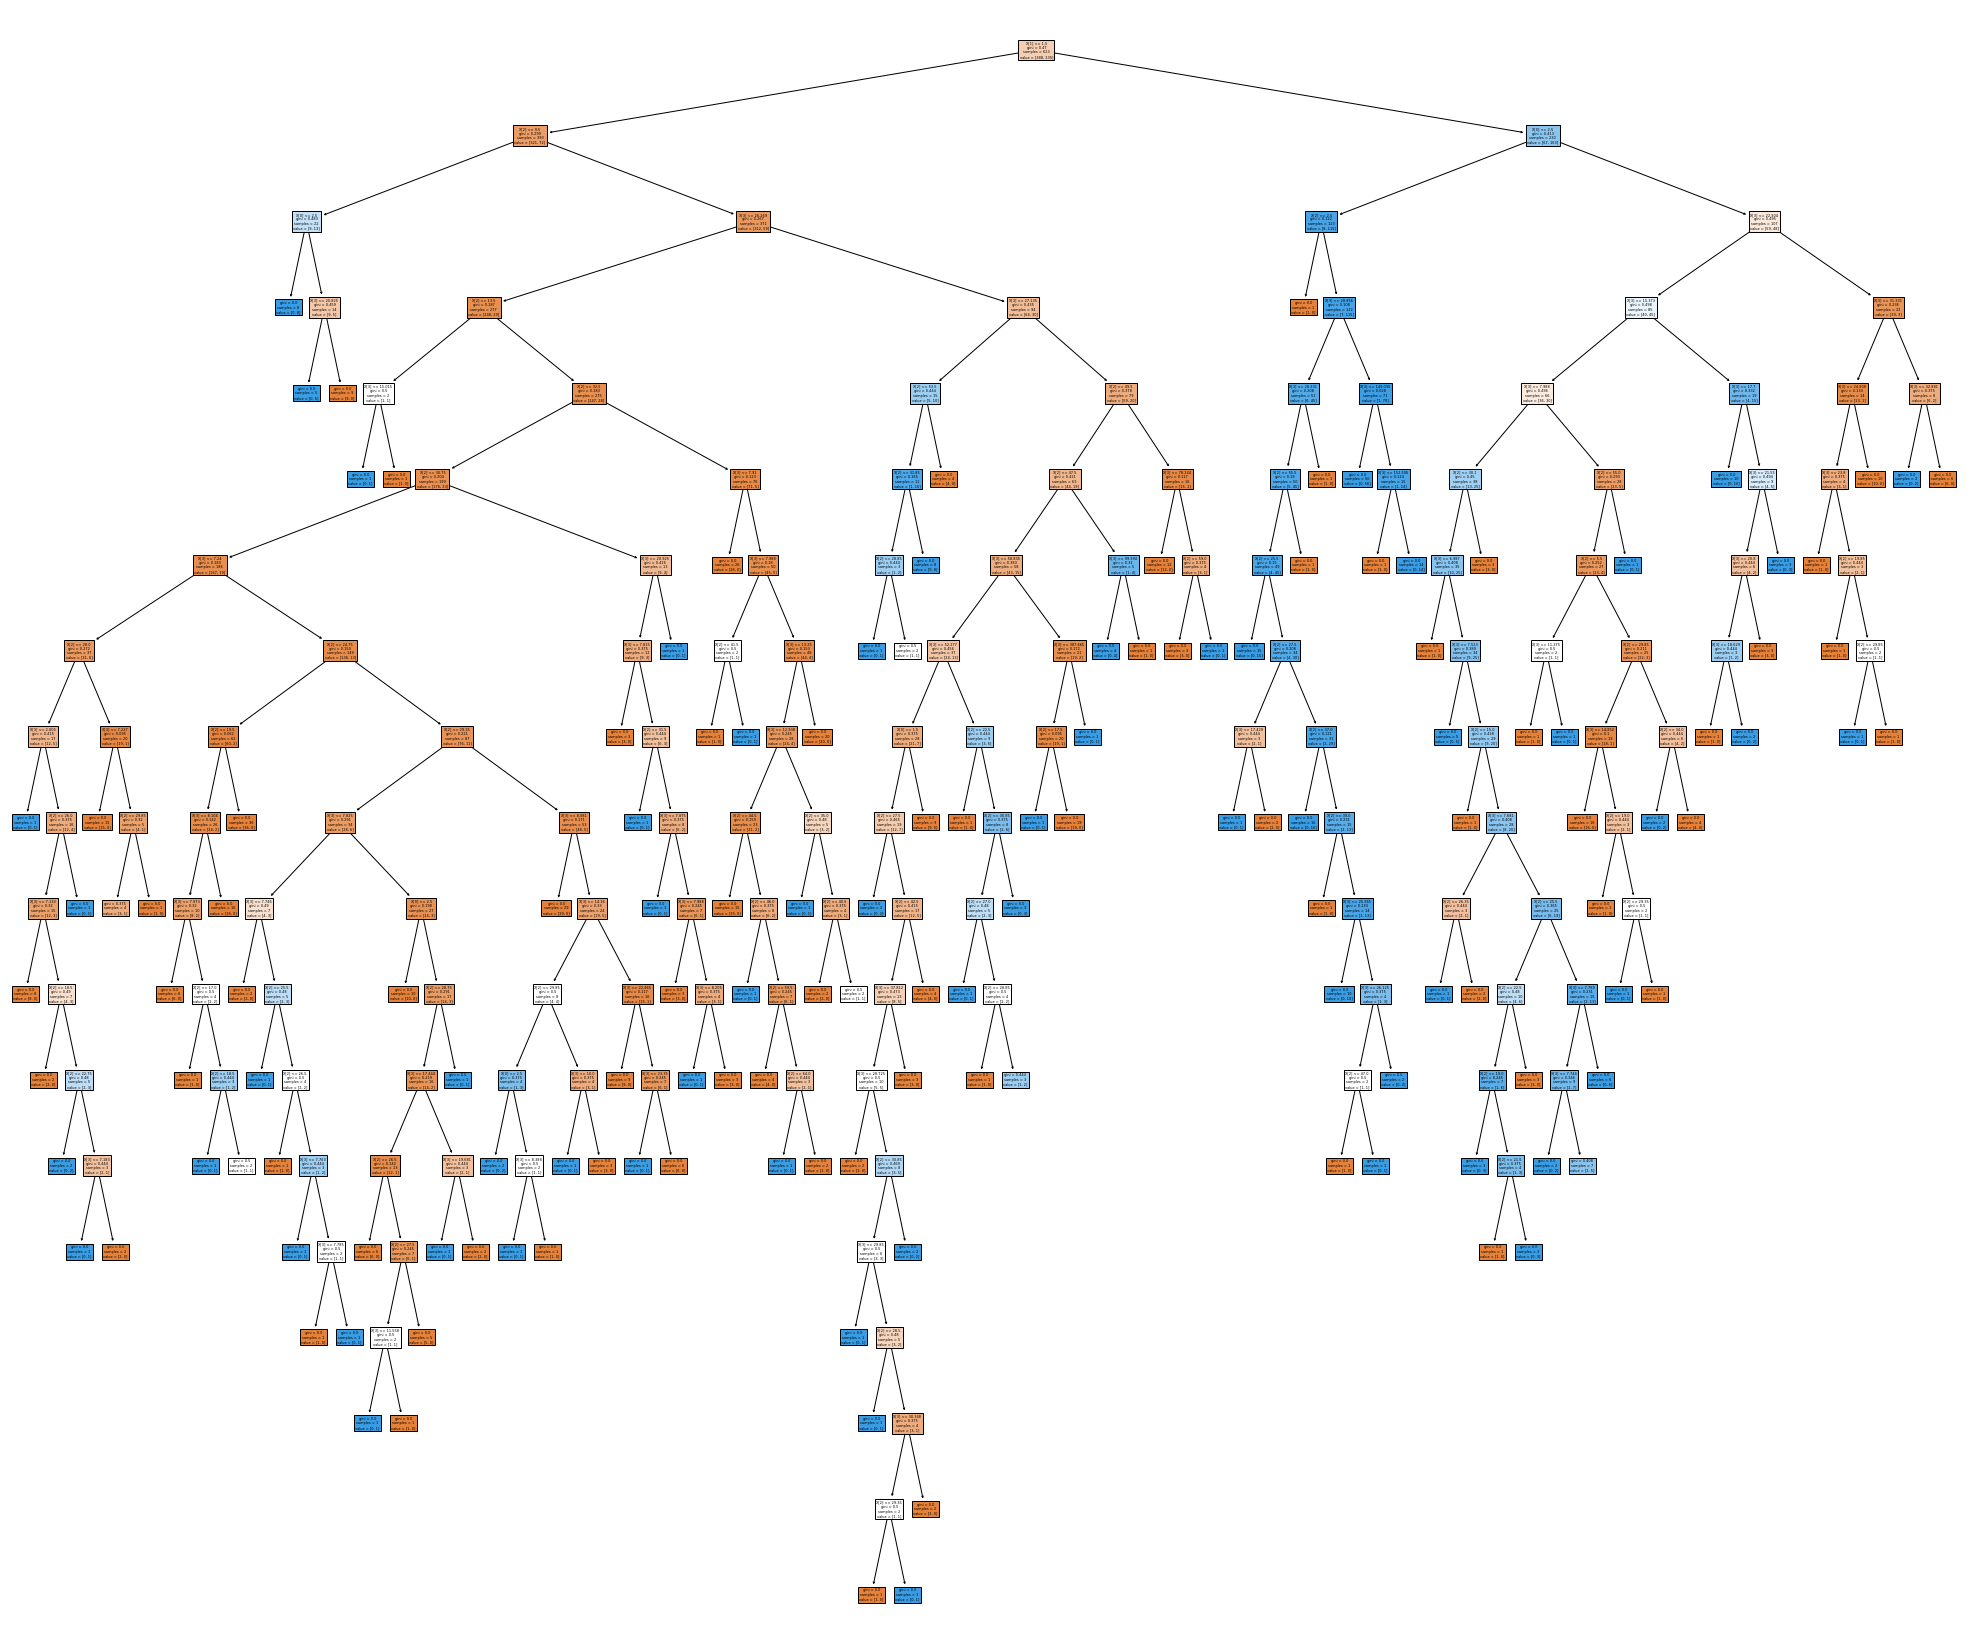

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(35,30))
tree.plot_tree(model,filled=True);

In [20]:
print(tree.export_text(model))

|--- feature_1 <= 1.50
|   |--- feature_2 <= 9.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  2.50
|   |   |   |--- feature_3 <= 20.83
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  20.83
|   |   |   |   |--- class: 0
|   |--- feature_2 >  9.50
|   |   |--- feature_3 <= 26.27
|   |   |   |--- feature_2 <= 13.50
|   |   |   |   |--- feature_3 <= 15.01
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  15.01
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  13.50
|   |   |   |   |--- feature_2 <= 32.50
|   |   |   |   |   |--- feature_2 <= 30.75
|   |   |   |   |   |   |--- feature_3 <= 7.24
|   |   |   |   |   |   |   |--- feature_2 <= 28.00
|   |   |   |   |   |   |   |   |--- feature_3 <= 2.01
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_3 >  2.01
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 26.00
|   |   |   |   |   |   |   |   |   |   |--- fea

In [21]:
path = model.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [22]:
ccp_alphas #decide the depth for prevent overfit

# it will give the weak points wrt leaf nodes

array([0.        , 0.00016051, 0.00040765, 0.00048154, 0.00053505,
       0.00053505, 0.00057072, 0.00074524, 0.00077825, 0.00080257,
       0.00085607, 0.00096308, 0.00098778, 0.00099366, 0.00101377,
       0.00101831, 0.00120385, 0.00125876, 0.00128411, 0.00132732,
       0.00137583, 0.00137583, 0.00147138, 0.00149048, 0.00150482,
       0.00150482, 0.00150482, 0.00151267, 0.00158253, 0.00160514,
       0.00160514, 0.00160514, 0.0016217 , 0.00177037, 0.00192884,
       0.00207488, 0.00208777, 0.00209742, 0.00214018, 0.00224634,
       0.00256822, 0.00266828, 0.00276178, 0.00282926, 0.00285358,
       0.00290453, 0.00300376, 0.00330845, 0.00333631, 0.00452576,
       0.00735109, 0.00853641, 0.00860161, 0.00866745, 0.01036218,
       0.01243572, 0.04345311, 0.12861821])

In [24]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1286182063817941


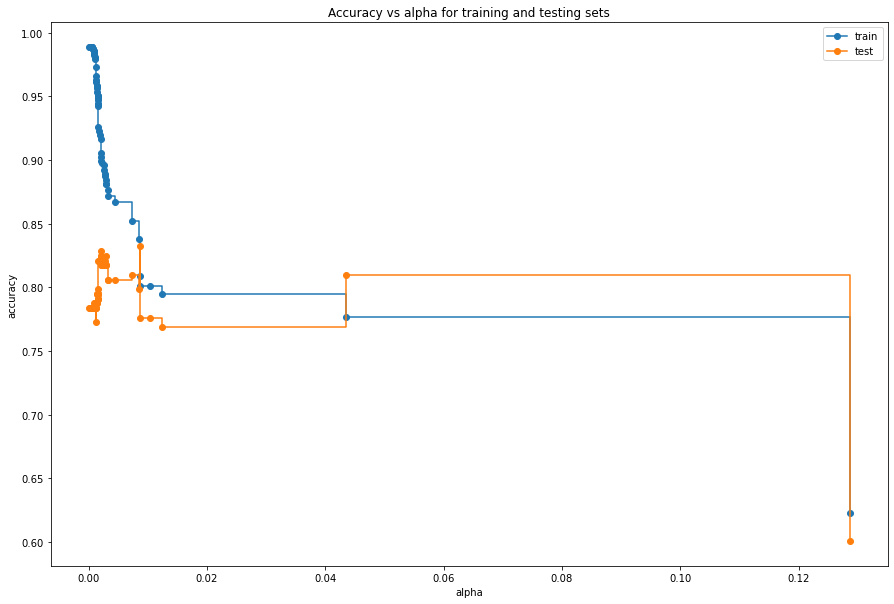

In [25]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]


fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [39]:
clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.045)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.045, random_state=0)

In [40]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8097014925373134

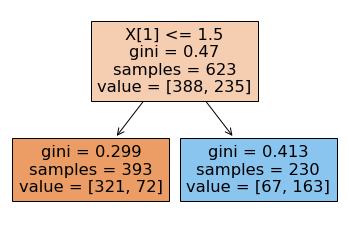

In [42]:
plt.figure()
tree.plot_tree(clf,filled=True);
# so now in very few leafs u can decision it(predict it)